In [1]:
%matplotlib inline

In [2]:
import re
from collections import OrderedDict
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def load_data(name):
    with open(name) as sr:
        lines =  sr.read().split('\n')[1:-1]
        return pd.DataFrame(OrderedDict([
            ('loss', [float(re.search(r'loss: ([\d.]+)', line).group(1)) for line in lines]),
            ('val acc', [float(re.search(r'val acc: ([\d.]+)', line).group(1)) for line in lines]),
            ('test acc', [float(re.search(r'test acc: ([\d.]+)', line).group(1)) for line in lines]),
        ]))

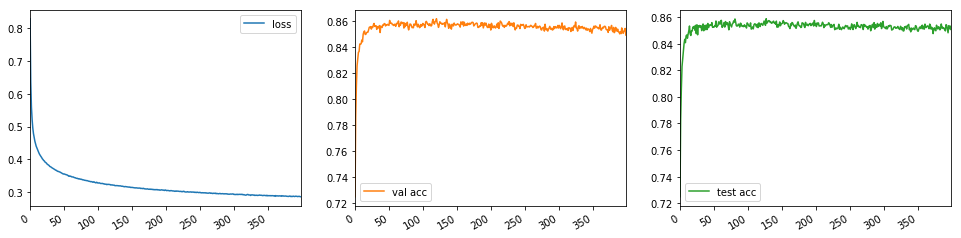

In [4]:
# without projection, we have overfitting
load_data('results/results_54c3186f.txt').plot(subplots=True, figsize=(16.5, 4.0), layout=(1, 3)); None

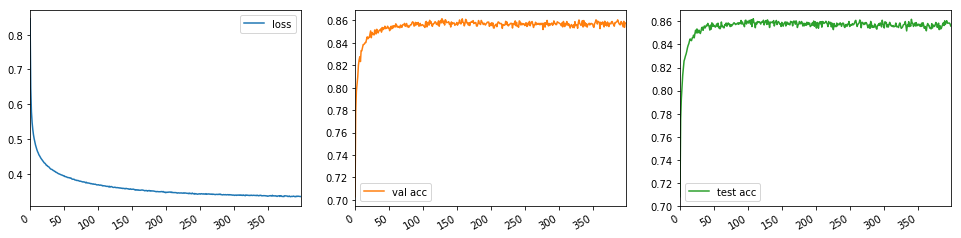

In [5]:
# no overfitting if there is projection but random projections
load_data('results/results_846be160.txt').plot(subplots=True, figsize=(16.5, 4.0), layout=(1, 3)); None

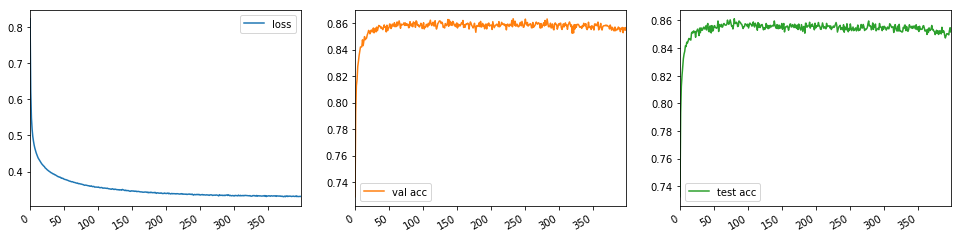

In [6]:
# if projections have better initializations we have overfitting, suggesting that projection alone does not fix this
load_data('results/results_d2eacd77.txt').plot(subplots=True, figsize=(16.5, 4.0), layout=(1, 3)); None

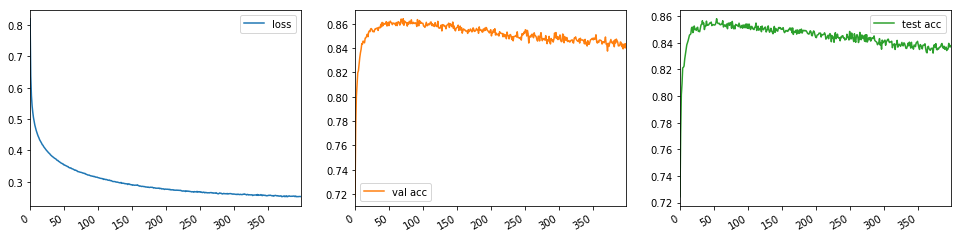

In [7]:
# severe overfitting on intra-sentence
load_data('results/results_d841b5b4.txt').plot(subplots=True, figsize=(16.5, 4.0), layout=(1, 3)); None

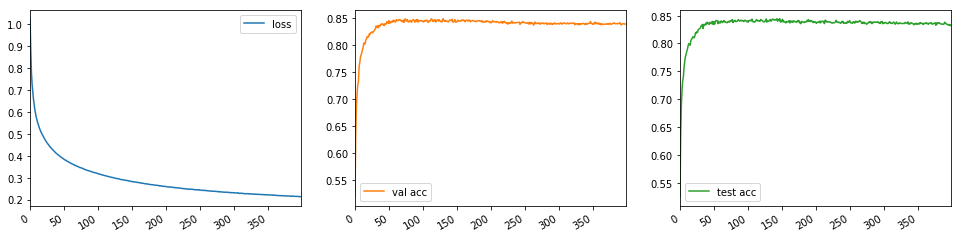

In [8]:
# using paper's adagrad and it's settings we still have overfitting
load_data('results/results_6de6cb8c.txt').plot(subplots=True, figsize=(16.5, 4.0), layout=(1, 3)); None

In [9]:
data = load_data('results/results_6de6cb8c.txt')
print(data.iloc[-1])
print(data.iloc[data['val acc'].argmax()])

loss        0.213665
val acc     0.838549
test acc    0.832858
Name: 399, dtype: float64
loss        0.295043
val acc     0.848506
test acc    0.839984
Name: 130, dtype: float64
